In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Inches,Ram,Weight,Price,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,8,1.37,71378.6832,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,13.3,8,1.34,47895.5232,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15.6,8,1.86,30636.0000,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,15.4,16,1.83,135195.3360,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,13.3,8,1.37,96095.8080,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [28]:
#Final dataset check

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Columns: 338 entries, Inches to OpSys_macOS
dtypes: bool(334), float64(3), int64(1)
memory usage: 465.3 KB


In [ ]:
#SIMPLE LINEAR REGRESSION

In [72]:
#Feature select

In [73]:
# Feature = RAM
X = df_original["Ram"].str.replace("GB","").astype(int).values
y = df_original["Price"].values

print("Total samples:", len(X))

Total samples: 1303


In [74]:
#Mean calculation

In [75]:
x_mean = np.mean(X)
y_mean = np.mean(y)

print("X mean:", x_mean)
print("Y mean:", y_mean)

X mean: 8.382194934765925
Y mean: 59870.042910207216


In [78]:
#Slope & Intercept Formula
# m = Σ((x-x̄)(y-ȳ)) / Σ((x-x̄)²)
# b = ȳ − m x̄

In [79]:
numerator = np.sum((X - x_mean)*(y - y_mean))
denominator = np.sum((X - x_mean)**2)

m = numerator / denominator
b = y_mean - m*x_mean

print("Slope (m):", m)
print("Intercept (b):", b)

Slope (m): 5442.239841626486
Intercept (b): 14252.127675944372


In [80]:
#Prediction

In [81]:
y_pred = m*X + b

In [82]:
#Regression line plot

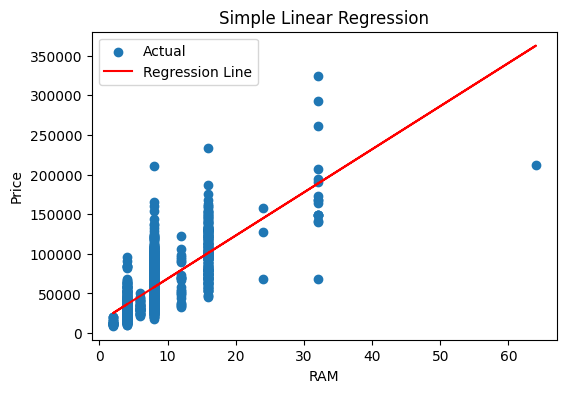

In [83]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, label="Actual")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("RAM")
plt.ylabel("Price")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [84]:
#Metrics

In [85]:
def mse(y, y_pred):
    return np.mean((y - y_pred)**2)

def rmse(y, y_pred):
    return np.sqrt(mse(y,y_pred))

def r2(y, y_pred):
    ss_res = np.sum((y-y_pred)**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    return 1 - ss_res/ss_tot

print("MSE:", mse(y,y_pred))
print("RMSE:", rmse(y,y_pred))
print("R2:", r2(y,y_pred))

MSE: 620841613.8938603
RMSE: 24916.693478346206
R2: 0.5520596030334446


In [86]:
#Simple LR using Gradient Descent

In [87]:
#Best feature select (RAM)

In [88]:
# Using RAM as feature
X = df_original["Ram"].str.replace("GB","").astype(int).values
y = df_original["Price"].values

# normalize for stable gradient descent
X = (X - X.mean())/X.std()
y = (y - y.mean())/y.std()

In [89]:
#Initialize parameters

In [90]:
m = 0   # slope
b = 0   # intercept

lr = 0.01
epochs = 1000
n = len(X)

In [91]:
#Gradient Descent loop

In [92]:
cost_list = []

for i in range(epochs):
    y_pred = m*X + b

    # cost function (MSE)
    cost = (1/n)*np.sum((y - y_pred)**2)
    cost_list.append(cost)

    # gradients
    dm = (-2/n)*np.sum(X*(y - y_pred))
    db = (-2/n)*np.sum(y - y_pred)

    # update
    m = m - lr*dm
    b = b - lr*db

    if i % 100 == 0:
        print(f"Epoch {i}, Cost {cost}")


Epoch 0, Cost 1.0
Epoch 100, Cost 0.45764999178788346
Epoch 200, Cost 0.4481111688018361
Epoch 300, Cost 0.44794340049247605
Epoch 400, Cost 0.44794044979240893
Epoch 500, Cost 0.4479403978956537
Epoch 600, Cost 0.44794039698289634
Epoch 700, Cost 0.44794039696684285
Epoch 800, Cost 0.4479403969665605
Epoch 900, Cost 0.4479403969665556


In [93]:
#Final parameters

In [94]:
print("Final slope:", m)
print("Final intercept:", b)

Final slope: 0.7430071340002384
Final intercept: 3.108283648374965e-17


In [95]:
#Cost function graph

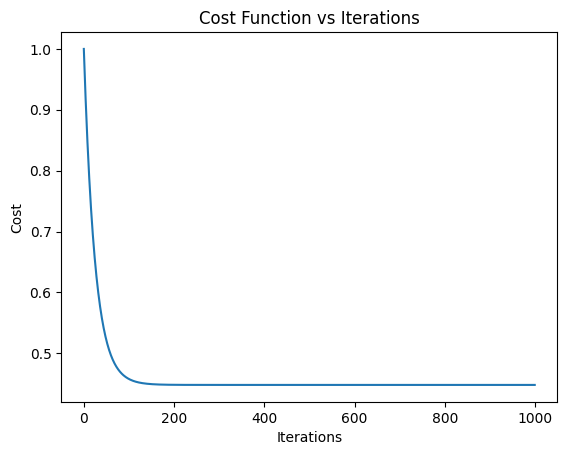

In [96]:
plt.plot(cost_list)
plt.title("Cost Function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [97]:
#Regression line

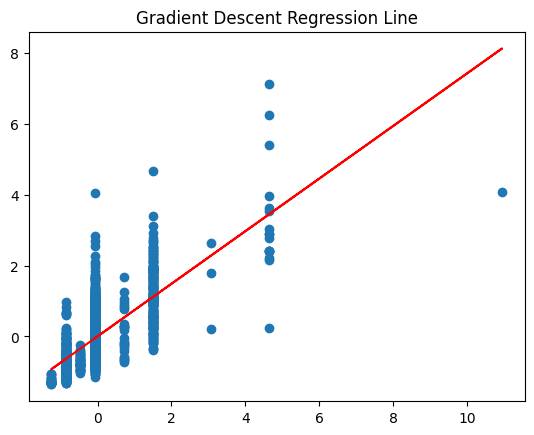

In [98]:
y_pred = m*X + b

plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.title("Gradient Descent Regression Line")
plt.show()

In [99]:
#Gradient values show

In [100]:
print("Gradient m:", dm)
print("Gradient b:", db)

Gradient m: -2.5519520365740674e-09
Gradient b: 4.362503366140293e-17


In [101]:
# R2 score
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)

r2 = 1 - (ss_res/ss_tot)
print("R2 score:", r2)

R2 score: 0.5520596030334446


In [102]:
print("Final slope:", m)
print("Final intercept:", b)
print("Final cost:", cost)
print("Final R2:", r2)

Final slope: 0.7430071340002384
Final intercept: 3.108283648374965e-17
Final cost: 0.44794039696655547
Final R2: 0.5520596030334446


In [103]:
# =========================================
# Applying Gradient Descent on Multiple Features
# Comparing Cost and R2 to select best feature
# =========================================

In [104]:
#Gradient descent for any feature

In [106]:
def run_gradient_descent(feature_array, target, lr=0.01, epochs=500):
    
    # normalize
    X = (feature_array - feature_array.mean())/feature_array.std()
    y = (target - target.mean())/target.std()

    m = 0
    b = 0
    n = len(X)

    cost_list = []

    for i in range(epochs):
        y_pred = m*X + b
        
        cost = (1/n)*np.sum((y - y_pred)**2)
        cost_list.append(cost)

        dm = (-2/n)*np.sum(X*(y - y_pred))
        db = (-2/n)*np.sum(y - y_pred)

        m -= lr*dm
        b -= lr*db

    # final R2
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - ss_res/ss_tot

    return cost_list, r2, m, b

In [107]:
#Prepare features

In [108]:
# RAM
ram = df_original["Ram"].str.replace("GB","").astype(int).values

# Weight
weight = df_original["Weight"].str.replace("kg","").astype(float).values

y = df_original["Price"].values

In [109]:
#Run gradient descent on each

In [110]:
cost_ram, r2_ram, m_ram, b_ram = run_gradient_descent(ram, y)
cost_weight, r2_weight, m_weight, b_weight = run_gradient_descent(weight, y)

In [111]:
#Accuracy

In [112]:
print("RAM R2:", r2_ram)
print("Weight R2:", r2_weight)

RAM R2: 0.5520596020660369
Weight R2: 0.04425545221877347


In [113]:
#Cost vs iteration graphs (ALL)

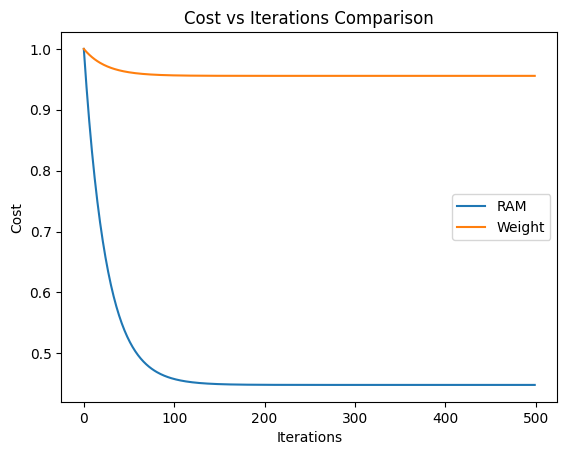

In [114]:
plt.plot(cost_ram, label="RAM")
plt.plot(cost_weight, label="Weight")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations Comparison")
plt.legend()
plt.show()

In [115]:
#Select best feature

In [116]:
if r2_ram > r2_weight:
    best_feature = "RAM"
    best_cost = cost_ram
    best_m = m_ram
    best_b = b_ram
    X_best = ram
else:
    best_feature = "Weight"
    best_cost = cost_weight
    best_m = m_weight
    best_b = b_weight
    X_best = weight

print("Best feature:", best_feature)

Best feature: RAM


In [117]:
#Final regression graph

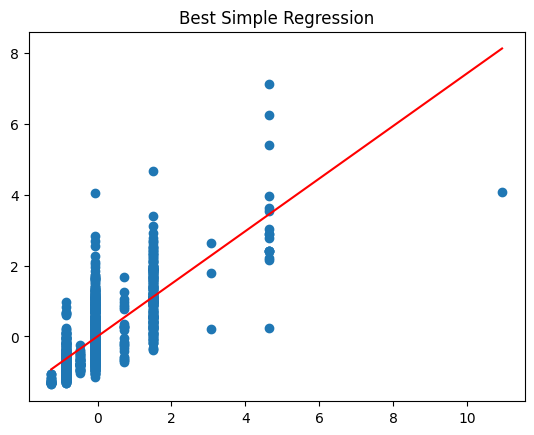

In [118]:
# normalize best feature
Xn = (X_best - X_best.mean())/X_best.std()
yn = (y - y.mean())/y.std()

y_pred = best_m*Xn + best_b

sorted_idx = np.argsort(Xn)

plt.scatter(Xn, yn)
plt.plot(Xn[sorted_idx], y_pred[sorted_idx], color="red")
plt.title("Best Simple Regression")
plt.show()